# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html               ## Pulling in the website content 

soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data       

# Finding all table rows that contain the data
all_rows = soup.find_all('tr', class_='data-row')

# Iterating through each row
for row in all_rows:
  # Finding the actual data in each row
  all_row_data = row.find_all('td')

  # Extracting the data from each row in the table
  for row_data in all_row_data:
    print(row_data.text.strip())


# ##### ===================== THIS IS LIST FORM ========================== #######

# # Empty list to hold row data and turning it into a list
# data_list = []

# # Finding all table rows that contain the data
# all_rows = soup.find_all('tr', class_='data-row')

# # Iterating through each row
# for row in all_rows:
#   # Finding the actual data in each row
#   all_row_data = row.find_all('td')

#   # Extracting the data from each row in the table
#   for row_data in all_row_data:
#     row_text = row_data.text.strip() 
#     # Appending the rows of data into a "data_list"
#     data_list.append(row_text)

# # Displaying the list
# data_list



2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172
6
-75.0
753.0
183
2012-09-17
41
172
6
-75.0
753.0
1

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# # Create an empty list
mars_weather_data_list = []

# # Loop through the scraped data to create a list of rows

main_table = soup.find_all("table", class_='table')

# Retrieving table headers
table_headers = [t_header.text.strip() for t_header in soup.find('table').find_all('th')]

# For Loop to loop through the table
for table in soup.find_all("table", class_='table'):
  # For Loop to extract the rows that contain the actual data ==> '[1:]' skips the header row since that was already found above in "table_headers"
  for table_data in table.find_all('tr')[1:]:
    # Zipping "table_headers" and "table_data" to create a list of dictionaries with all data with their respective headers
    row_data = {header: data.text.strip() for header, data in zip(table_headers, table_data.find_all('td'))}
    mars_weather_data_list.append(row_data)


#### ========= WORKING CODE TO GET THE FIRST TABLE ========= ###########
# df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
# mars_df = df[0]
# mars_df.head()

#### ========= !!!!!! WORKING CODE TO RETRIEVE NECESSARY DATA !!!!!! ========= ###########
# ## RETRIEVING TABLE HEADERS
# table_headers = soup.find_all('th')
# [headers.text for headers in table_headers]

# ## RETRIEVING DATA IN THE TABLES
# table_data = soup.find_all("td")
# [data.text for data in table_data]
# ## ------- NOT WORKING ------
# row_data_list = []

# for row_data in table.find_all('tr')[1:]:
#     table_date = row_data.find_all('td')
#     row_data_list.append(table_date)

# row_data_list

In [7]:
## JUST KEEP FOR REFERENCE AT THE MOMENT !!!!!!

mars_weather_data_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [8]:
mars_weather_df = pd.DataFrame(mars_weather_data_list)
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [8]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################

# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################

# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

# Converting "terrestrial_date" column data into datetime64[ns]
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Converting "sol" column data into int64
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int64')

# Converting "ls" column data into int64
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int64')

# Converting "min_temp" column data into float64
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype('float64')

# Converting "pressure" column data into int64
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype('float64')

In [11]:
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################


# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

#### !!!!!!!!!??!?!?!? WHY WONT THIS SORT !?!?!?!?!?!

#mars_weather_df.sort_values("month")

mars_months = mars_weather_df.groupby('month').size()#.sort_values(axis=0)
mars_months.sort_index()

month
1     174
10    112
11    138
12    166
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
dtype: int64

In [12]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################


# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
total_martian_days = mars_weather_df['sol'].count()
total_martian_days

1867

In [13]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################
# 2. How many Martian days' worth of data are there?


1867

In [14]:
# 3. What is the average low temperature by month?

### !!!!!!!!!!!!!!!!!! NOT SORTING   !!!!!!!!!!!!!!!!!!!!
months_avg_low_temp = mars_weather_df.groupby(['month'])['min_temp'].mean()
months_avg_low_temp.sort_index()

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

In [14]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################

# 3. What is the average low temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


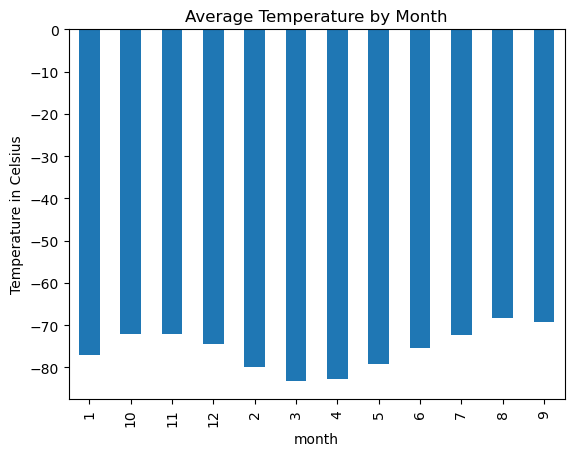

In [15]:
# Plot the average temperature by month

### !!!!!!!!!!!!!!!!!!!!!!!!!!!!! NEEDS TO BE SORTED BY MONTHS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Plotting a bar chart using series.plot method
months_avg_low_temp.plot(kind = "bar")

# Adding in x & y-labels w/ plot title
plt.title('Average Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

# Displaying bar chart
plt.show()

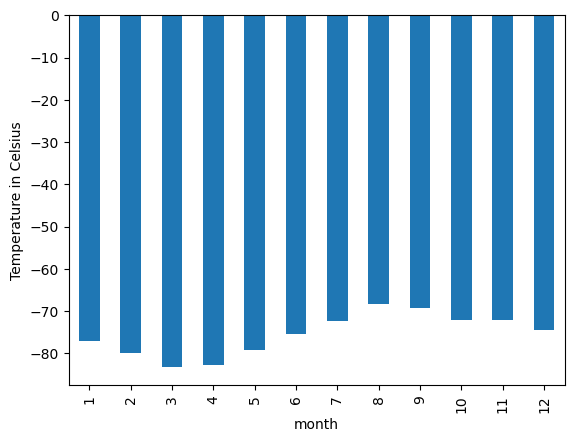

In [15]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################

# Plot the average temperature by month


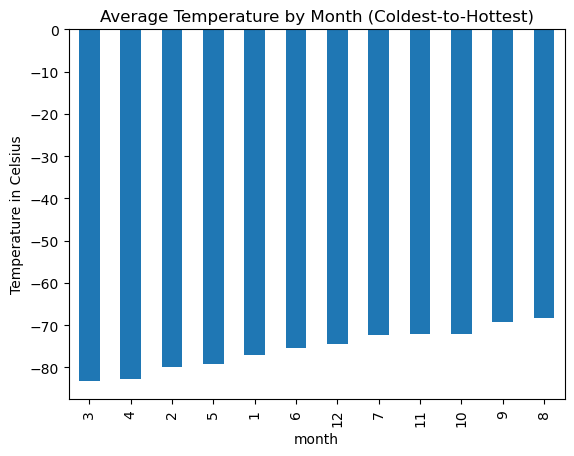

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Sorting the average minimum temperatures per month in "months_avg_low_temp" series in ascending order
coldest_to_hottest_months = months_avg_low_temp.sort_values()

# Plotting a bar chart using series.plot method
coldest_to_hottest_months.plot(kind = 'bar')

# Adding in x & y-labels w/ plot title
plt.title('Average Temperature by Month (Coldest-to-Hottest)')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

# Displaying bar chart
plt.show()

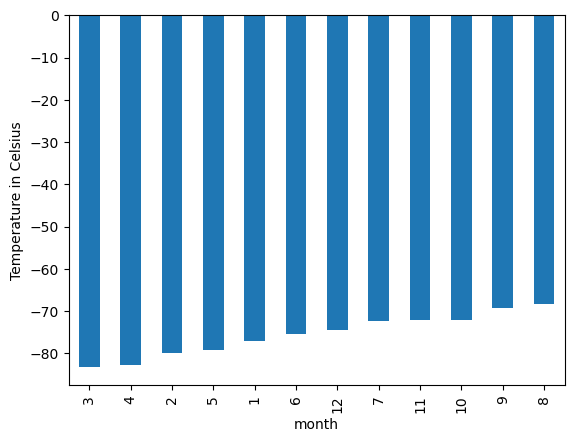

In [16]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################

# Identify the coldest and hottest months in Curiosity's location


In [17]:
# 4. Average pressure by Martian month

######!!!!!!!!!!!!!!!!!!!  NEEDS TO BE SORTED !!!!!!!!!!!!!!!!!!!!!!!!!!

months_avg_pressure = mars_weather_df.groupby(['month'])['pressure'].mean()
months_avg_pressure

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

In [17]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################


# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


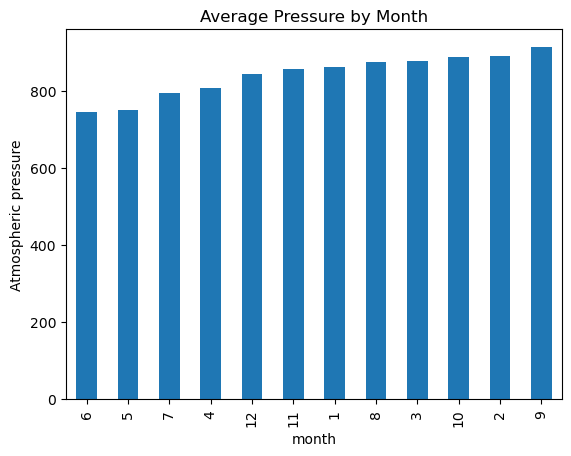

In [18]:
# Plot the average pressure by month

# Sorting the average atmospheric pressure per month in "months_avg_pressure" series in ascending order
lowest_to_highest_pressure_months = months_avg_pressure.sort_values()


# Plotting a bar chart using series.plot method
lowest_to_highest_pressure_months.plot(kind = 'bar')

# Adding in x & y-labels w/ plot title
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric pressure')

# Displaying bar chart
plt.show()

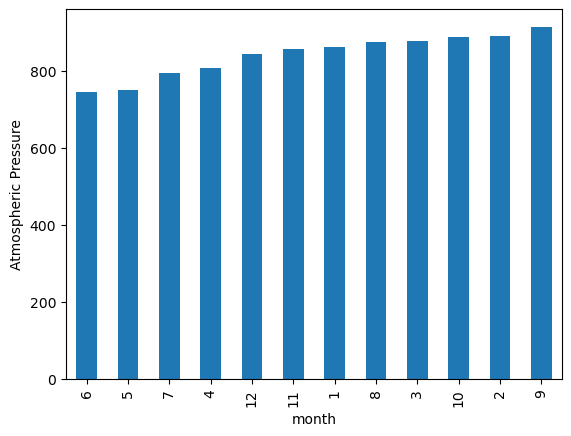

In [18]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################


# Plot the average pressure by month


In [134]:
total_martian_days

# total_earth_days = mars_weather_df['terrestrial_date'].count()
# total_earth_days

1867

In [126]:
martian_year_days = 687
earth_year_days = 365.25  
conversion_factor = ((earth_year_days / martian_year_days)/ 10)
conversion_factor

0.05316593886462882

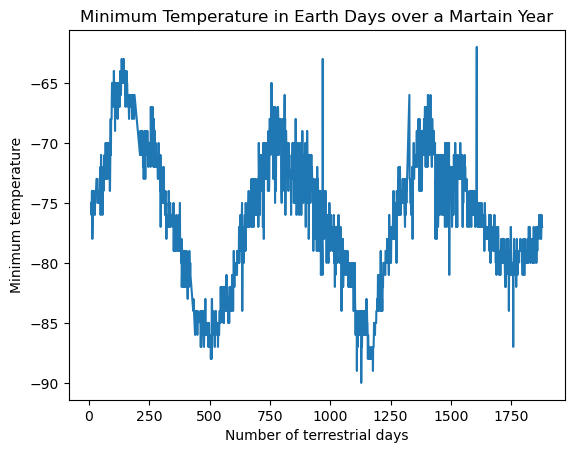

In [137]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year_days = 687
earth_year_days = 365.25  
conversion_factor = ((earth_year_days / martian_year_days)/ 10)
conversion_factor

x_axis = (mars_weather_df['sol'] / (1+conversion_factor))
y_axis = mars_weather_df['min_temp']

plt.plot(x_axis, y_axis)

# Adding in x & y-labels w/ plot title
plt.title('Minimum Temperature in Earth Days over a Martain Year')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')


# Displaying plot
plt.show()

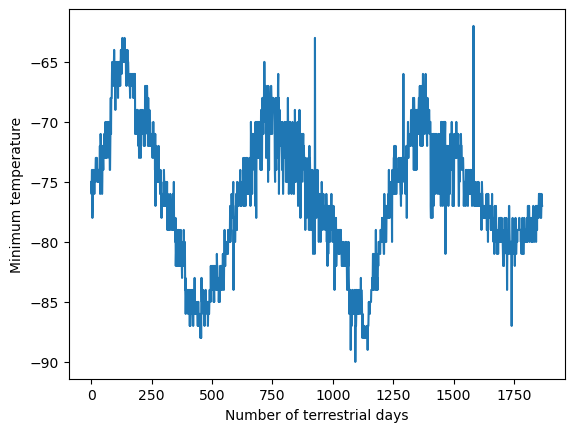

In [19]:
##### !!!!!!!!!!!!!!!   REFERENCE   !!!!!!!!!!!!!!!!!!!! #####################

# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [98]:
# Write the data to a CSV
mars_weather_df.to_csv('scrapping_output_data/mars_weather_data')

In [21]:
browser.quit()